In [93]:
import math
import io
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import product, combinations
import matplotlib
import matplotlib.pyplot as pp


#### visualize permutation sampling

In [94]:
rain_june = np.array([66.2, 39.7, 76.4, 26.5, 11.2, 61.8, 6.1, 48.4, 89.2,
                      104., 34., 60.6, 57.1, 79.1, 90.9, 32.3, 63.8, 78.2,
                      27.5, 43.4, 30.1, 17.3, 77.5, 44.9, 92.2, 39.6, 79.4,
                      66.1, 53.5, 98.5, 20.8, 55.5, 39.6, 56., 65.1, 14.8,
                      13.2, 88.1, 8.4, 32.1, 19.6, 40.4, 2.2, 77.5, 105.4,
                      77.2, 38., 27.1, 111.8, 17.2, 26.7, 23.3, 77.2, 87.2,
                      27.7, 50.6, 60.3, 15.1, 6., 29.4, 39.3, 56.3, 80.4,
                      85.3, 68.4, 72.5, 13.3, 28.4, 14.7, 37.4, 49.5, 57.2,
                      85.9, 82.1, 31.8, 126.6, 30.7, 41.4, 33.9, 13.5, 99.1,
                      70.2, 91.8, 61.3, 13.7, 54.9, 62.5, 24.2, 69.4, 83.1,
                      44., 48.5, 11.9, 16.6, 66.4, 90., 34.9, 132.8, 33.4,
                      225., 7.6, 40.9, 76.5, 48., 140., 55.9, 54.1, 46.4,
                      68.6, 52.2, 108.3, 14.6, 11.3, 29.8, 130.9, 152.4, 61.,
                      46.6, 43.9, 30.9, 111.1, 68.5, 42.2, 9.8, 285.6, 56.7,
                      168.2, 41.2, 47.8, 166.6, 37.8, 45.4, 43.2])

rain_november = np.array([83.6, 30.9, 62.2, 37., 41., 160.2, 18.2, 122.4, 71.3,
                          44.2, 49.1, 37.6, 114.5, 28.8, 82.5, 71.9, 50.7, 67.7,
                          112., 63.6, 42.8, 57.2, 99.1, 86.4, 84.4, 38.1, 17.7,
                          102.2, 101.3, 58., 82., 101.4, 81.4, 100.1, 54.6, 39.6,
                          57.5, 29.2, 48.8, 37.3, 115.4, 55.6, 62., 95., 84.2,
                          118.1, 153.2, 83.4, 104.7, 59., 46.4, 50., 147.6, 76.8,
                          59.9, 101.8, 136.6, 173., 92.5, 37., 59.8, 142.1, 9.9,
                          158.2, 72.6, 28., 112.9, 119.3, 199.2, 50.7, 44., 170.7,
                          67.2, 21.4, 61.3, 15.6, 106., 116.2, 42.3, 38.5, 132.5,
                          40.8, 147.5, 93.9, 71.4, 87.3, 163.7, 141.4, 62.6, 84.9,
                          28.8, 121.1, 28.6, 32.4, 112., 50., 96.9, 81.8, 70.4,
                          117.5, 41.2, 124.9, 78.2, 93., 53.5, 50.5, 42.6, 47.9,
                          73.1, 129.1, 56.9, 103.3, 60.5, 134.3, 93.1, 49.5, 48.2,
                          167.9, 27., 111.1, 55.4, 36.2, 57.4, 66.8, 58.3, 60.,
                          161.6, 112.7, 37.4, 110.6, 56.6, 95.8, 126.8])


##### functions for permutation of two arrays and then randomly splitting into two mixed arrays

In [95]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y


# create a permutation of two datasets
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2



def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample - mix these two together and split again
        perm_sample_1, perm_sample_2 = permutation_sample(data1=data_1, data2=data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

##### plot 50 permutations of the

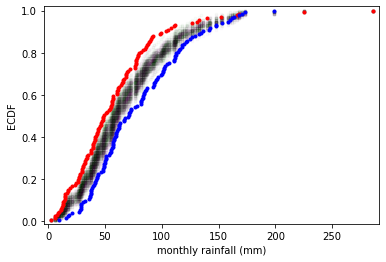

In [96]:

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='green', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='purple', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

The p-value is generally a measure of the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true.

As discussed in the video, a permutation replicate is a single value of a statistic computed from a permutation sample. As the draw_bs_reps() function you wrote in chapter 2 is useful for you to generate bootstrap replicates, it is useful to have a similar function, draw_perm_reps(), to generate permutation replicates. You will write this useful function in this exercise.

The function has call signature draw_perm_reps(data_1, data_2, func, size=1). Importantly, func must be a function that takes two arrays as arguments. In most circumstances, func will be a function you write yourself.

In [97]:
df = pd.DataFrame({'ID': {20: 'A',
        21: 'A',
        22: 'A',
        23: 'A',
        24: 'A',
        25: 'A',
        26: 'A',
        27: 'A',
        28: 'A',
        29: 'A',
        30: 'A',
        31: 'A',
        32: 'A',
        33: 'A',
        34: 'A',
        35: 'A',
        36: 'A',
        37: 'A',
        38: 'A',
        39: 'A',
        60: 'B',
        61: 'B',
        62: 'B',
        63: 'B',
        64: 'B',
        65: 'B',
        66: 'B',
        67: 'B',
        68: 'B',
        69: 'B',
        70: 'B',
        71: 'B',
        72: 'B',
        73: 'B',
        74: 'B',
        75: 'B',
        76: 'B',
        77: 'B',
        78: 'B',
        79: 'B'},
 'impact_force': {20: 1.612,
                  21: 0.605,
                  22: 0.327,
                  23: 0.946,
                  24: 0.541,
                  25: 1.539,
                  26: 0.529,
                  27: 0.628,
                  28: 1.453,
                  29: 0.297,
                  30: 0.703,
                  31: 0.269,
                  32: 0.751,
                  33: 0.245,
                  34: 1.182,
                  35: 0.515,
                  36: 0.435,
                  37: 0.383,
                  38: 0.457,
                  39: 0.73,
                  60: 0.172,
                  61: 0.142,
                  62: 0.037,
                  63: 0.453,
                  64: 0.355,
                  65: 0.022,
                  66: 0.502,
                  67: 0.273,
                  68: 0.72,
                  69: 0.582,
                  70: 0.198,
                  71: 0.198,
                  72: 0.597,
                  73: 0.516,
                  74: 0.815,
                  75: 0.402,
                  76: 0.605,
                  77: 0.711,
                  78: 0.614,
                  79: 0.468}})


In [98]:
# The function has call signature draw_perm_reps(data_1, data_2, func, size=1). Importantly, func must be a function that takes two arrays as arguments. In most circumstances, func will be a function you write yourself.

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample - mix these two together and split again
        perm_sample_1, perm_sample_2 = permutation_sample(data1=data_1, data2=data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a pandas DataFrame, df, where column ID is the identity of the frog and column impact_force is the impact force in Newtons (N).

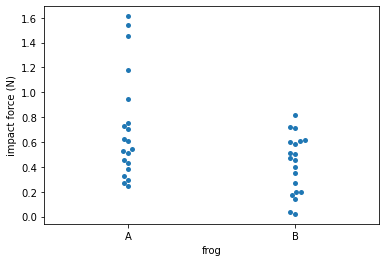

In [99]:
# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact_force', data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

Permutation test on frog data
The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

For your convenience, the data has been stored in the arrays force_a and force_b.

In [100]:
force_a = np.array([1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453,
       0.297, 0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383,
       0.457, 0.73 ])

force_b = np.array([0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72 ,
                    0.582, 0.198, 0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711,
                    0.614, 0.468])

In [101]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = data_1.mean() - data_2.mean()
    return diff


# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b, func=diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)
print('inverse p-value =', 1-p)

p-value = 0.0067
inverse p-value = 0.9933


The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same.

A p-value below 0.01 is typically said to be "statistically significant,"

but: warning! warning! warning! You have computed a p-value; it is a number.

I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!